<a href="https://colab.research.google.com/github/GreeshmaHarids/Greeshma_Meta_Scifor_Technology/blob/main/Machine_Learning/Mini_Project2/Email_Spam_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About Dataset
Overview:

This dataset contains a collection of emails, categorized into two classes: "**Spam**" and "**Non-Spam**" (often referred to as "**Ham**").

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
df= pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
df.shape

(5572, 5)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Steps


1.   Data Cleaning
2.   EDA
3.   Text Preprocessing
4.   Model Building
5.   Evaluvation



## 1.  Data Cleaning

In [42]:
#removing unwanted columns
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [43]:
#renaming
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [44]:
#encoding target column
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
df['target']=ln.fit_transform(df['target'])    #ham==0 and spam==1

In [45]:
df.sample(3)

,target,text
301,0,"Shit that is really shocking and scary, cant i..."
5324,0,"Dear Sir,Salam Alaikkum.Pride and Pleasure mee..."
5385,0,How do friends help us in problems? They give ...


In [46]:
#checking for null values

df.isna().sum()

,0
target,0
text,0


In [47]:
#checking for duplicates
df.duplicated().sum()

403

In [48]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [49]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2.  EDA

In [50]:
df['target'].value_counts()

,count
target,
0,4516
1,653


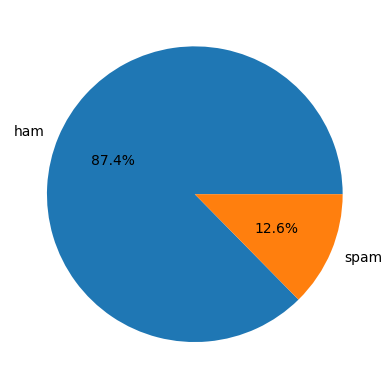

In [51]:
#plotting a pie chart to get a clear insight on the data

plt.pie(df['target'].value_counts(),autopct="%1.1f%%",labels=["ham","spam"])
plt.show()

It shows that there are only 12.6% of spam emails, so here the data is imbalanced.

In [52]:
import nltk
nltk.download('punkt_tab')   #used to get dependencies to work with this

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [53]:
#taking num of words of each text
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [54]:
df.head()

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [55]:
#decsibing num_words for spam and ham

print(f"Ham MSG:\n {df['num_words'][df['target']==1].describe()} \n")
print(f"Spam MSG:\n {df['num_words'][df['target']==0].describe()}")


Ham MSG:
 count    653.000000
mean      27.667688
std        7.008418
min        2.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       46.000000
Name: num_words, dtype: float64 

Spam MSG:
 count    4516.000000
mean       17.123782
std        13.493970
min         1.000000
25%         8.000000
50%        13.000000
75%        22.000000
max       220.000000
Name: num_words, dtype: float64


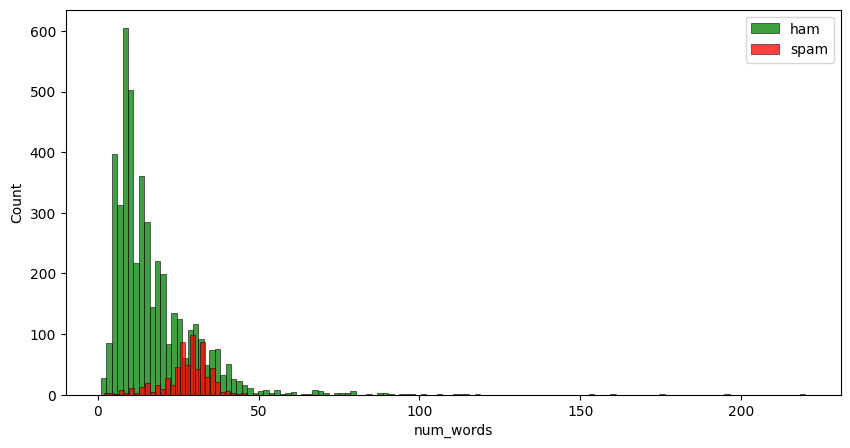

In [56]:
#plotting using histogram
plt.figure(figsize=(10,5))
sns.histplot(df[df["target"]==0]['num_words'],color="g")
sns.histplot(df[df["target"]==1]['num_words'],color="r")
plt.legend(["ham","spam"])
plt.show()

So, here in most spam emails, the number of words is larger, whereas in most ham emails, the number of words is smaller.

<Axes: >

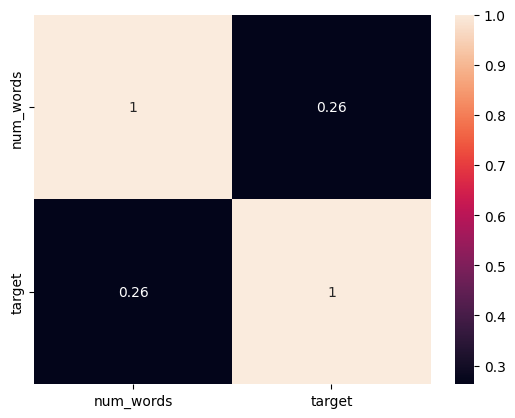

In [57]:
#checking for correlation
sns.heatmap(df[['num_words','target']].corr(),annot=True)

## Text Processing

### Data Preprocessing
1. Lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming/Lemmatization

In [58]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [61]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [62]:
df['transformed_text']=df['text'].apply(transform_text)

In [63]:
df.head()

,target,text,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,nah think goe usf live around though


Next, I am using a word cloud in this project to visually identify the most frequently used words in both ham and spam emails.

In [64]:
from wordcloud import WordCloud
wc= WordCloud(width=600,height=600,min_font_size=10,background_color="white")

In [65]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

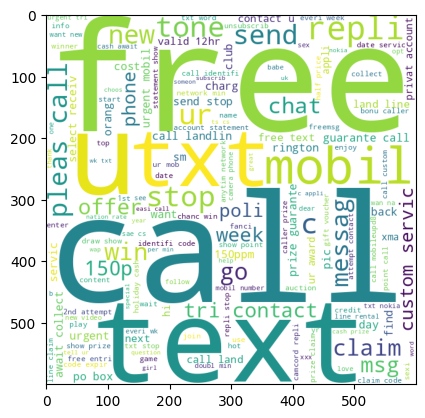

In [66]:
plt.figure()
plt.imshow(spam_wc)

In [67]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))

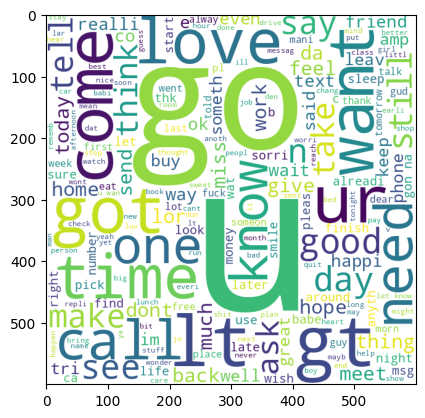

In [68]:
plt.figure()
plt.imshow(ham_wc)

## Model Building

Vectorization

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=3000)

In [119]:
#selecting X and y

X=tf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
X.shape

(5169, 3000)

In [121]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [122]:
y.shape

(5169,)

In [123]:
#splitting into training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [125]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8694390715667312
Precision: 0.5068493150684932
[[788 108]
 [ 27 111]]


In [126]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred2))
print("Precision:",precision_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

Accuracy: 0.9709864603481625
Precision: 1.0
[[896   0]
 [ 30 108]]


In [127]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred3))
print("Precision:",precision_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

Accuracy: 0.9835589941972921
Precision: 0.991869918699187
[[895   1]
 [ 16 122]]


For model selection, I evaluated Naive Bayes classifiers including GaussianNB, MultinomialNB, and BernoulliNB. After comparison, MultinomialNB was chosen as the best model because it achieved a precision of 1, resulting in 0 false positives. This is crucial for our imbalanced dataset, as the goal is to avoid misclassifying any ham emails as spam.